#Paquetes necesarios

In [8]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Realiza la cuenta de píxeles blancos por filas, determina el máximo para filas y columnas (uno para cada) y muestra el número de valores que superan en cada caso 0.95*máximo.

(0.0, 512.0)

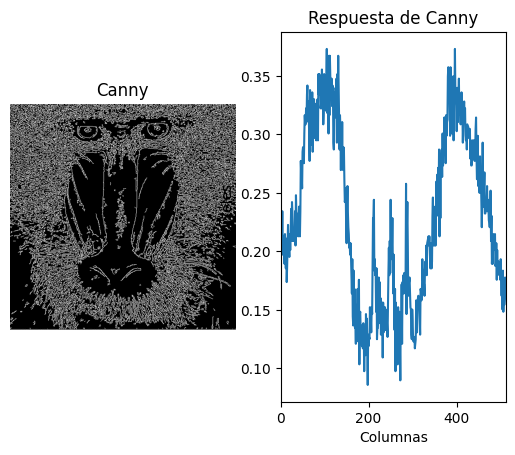

In [9]:
img = cv2.imread('mandril.jpg') 
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)
#Si muestras el contenido de la imagen resultado, son valores 0 o 255
#print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[1])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])

(0.0, 512.0)

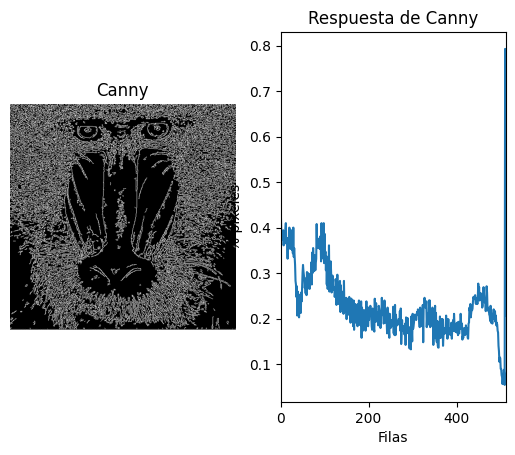

In [10]:
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
rows = row_counts / (255 * canny.shape[0])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])

In [11]:
colMax = 0
colMaxNum = 0
for i in range(0,len(col_counts[0])):
    if (col_counts[0][i] > colMax):
        colMax = col_counts[0][i]
        colMaxNum = i

cols95Num = 0
for i in range(0,len(col_counts[0])):
    if (col_counts[0][i] >= colMax*0.95):
        cols95Num+=1

TAREA: Elige otra imagen, muestra el contenido de alguna de las imágenes resultado de Sobel antes y después de ajustar la escala

TAREA: Aplica umbralizado a la imagen resultante de Sobel (valores 0 a 255 y convertida a 8 bits por ejemplo sobel8 = np.uint8(sobel)), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

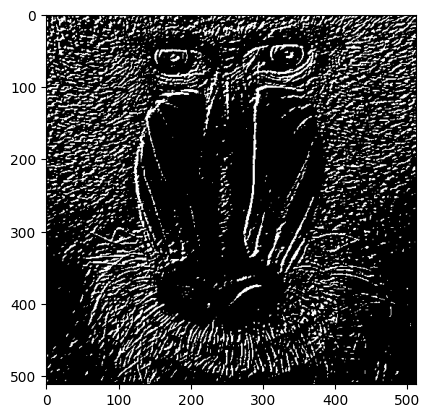

In [14]:
# Gaussiana para suavizar la imagen original
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)
#Define valor umbral
valorUmbral = 80 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(sobel, valorUmbral, 255, cv2.THRESH_BINARY)

plt.imshow(imagenUmbralizada, cmap='gray') #Visualiza con mapa de color gris
plt.show()


TAREA: Asumiendo que quieren mostrar a personas que no forman parte del curso de VC el comportamiento de una o varias funcioens de las vistas hasta este momento aplicadas sobre la entrada de la webcam. ¿Cuál(es) escogerían?

TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) propongan (los componentes de cada grupo) una reinterpretación del procesamiento de imágenes con las técnicas vistas o que conozcan.